In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Data Exploration and Pre-processing

### 1) load the given dataset

In [2]:
#pd.set_option('display.max_columns',None)
df = pd.read_excel('loan-applicants-risk-segmentation-dataset-1.xlsx')
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


### 2) Check for the null values

In [3]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

### 3) Get basic information from data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


### 4) Describe the dataset

In [5]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


### 5) Display scatterplot between age & Total work Experience

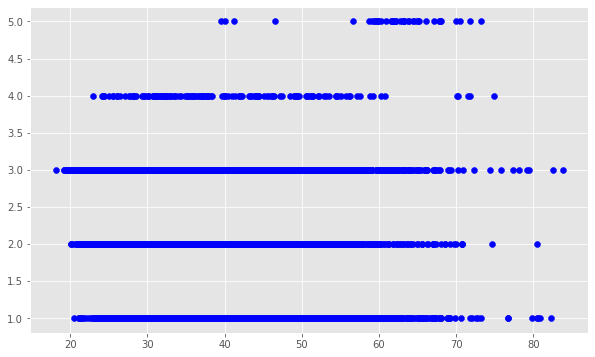

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x='Age',y='Total Work Experience',data=df,c='blue')

### 6) Display box plot for age

<AxesSubplot:xlabel='Age'>

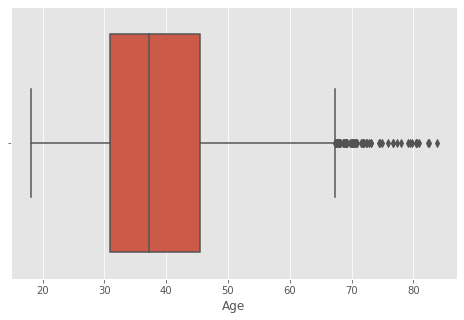

In [7]:
plt.figure(figsize=(8,5))

sns.boxplot(x='Age',data=df)

### 7) Display box plot for Cibil score

<AxesSubplot:xlabel='Cibil score'>

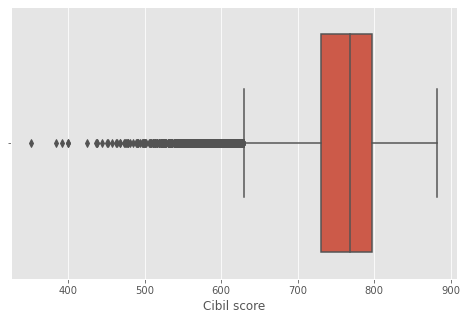

In [8]:
plt.figure(figsize=(8,5))

sns.boxplot(x='Cibil score',data=df)

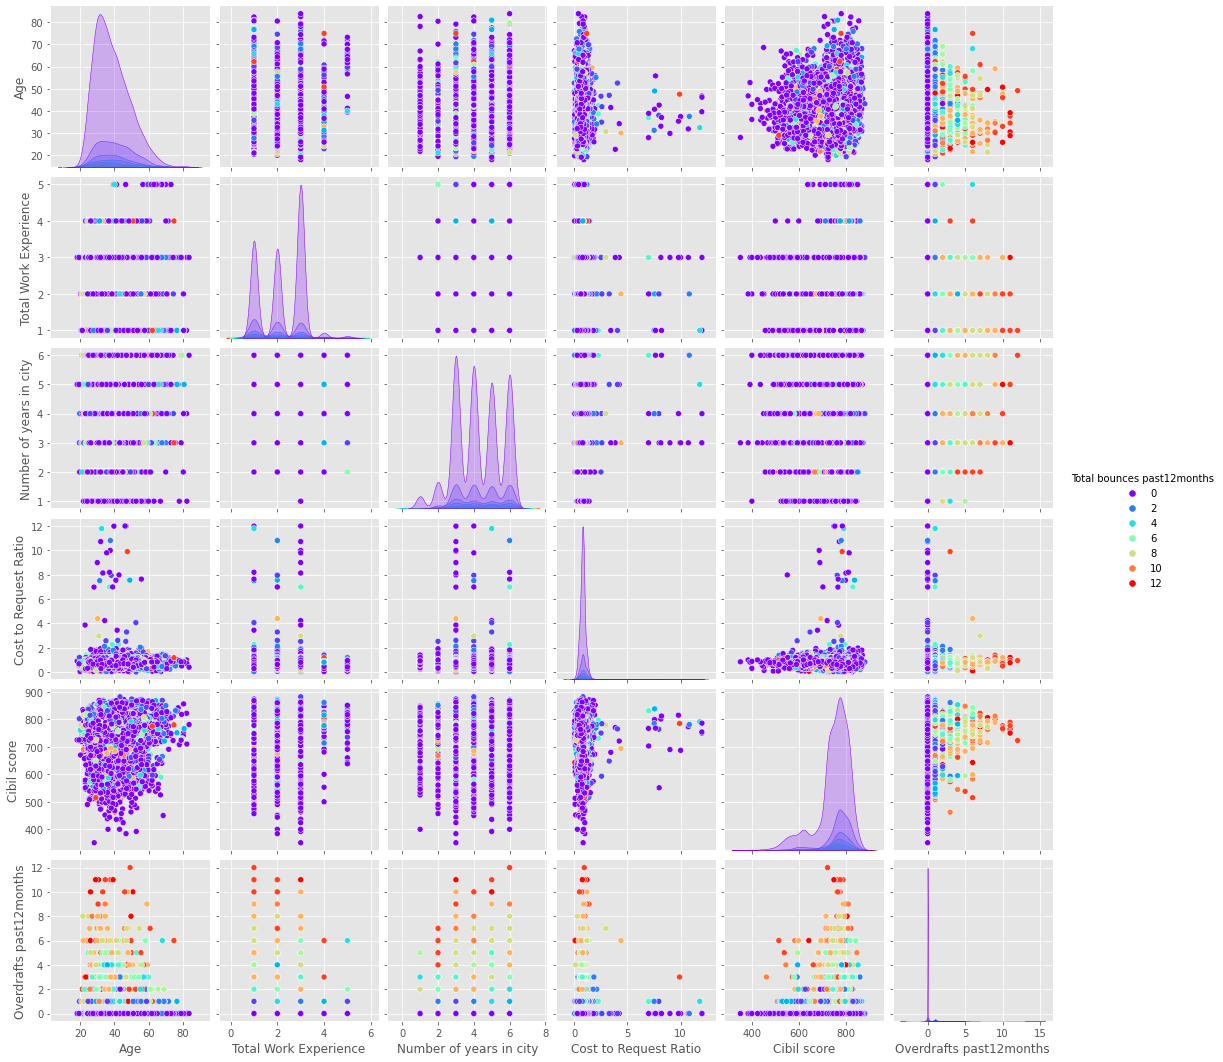

In [9]:
sns.pairplot(df,hue='Total bounces past12months',palette='rainbow')

<AxesSubplot:>

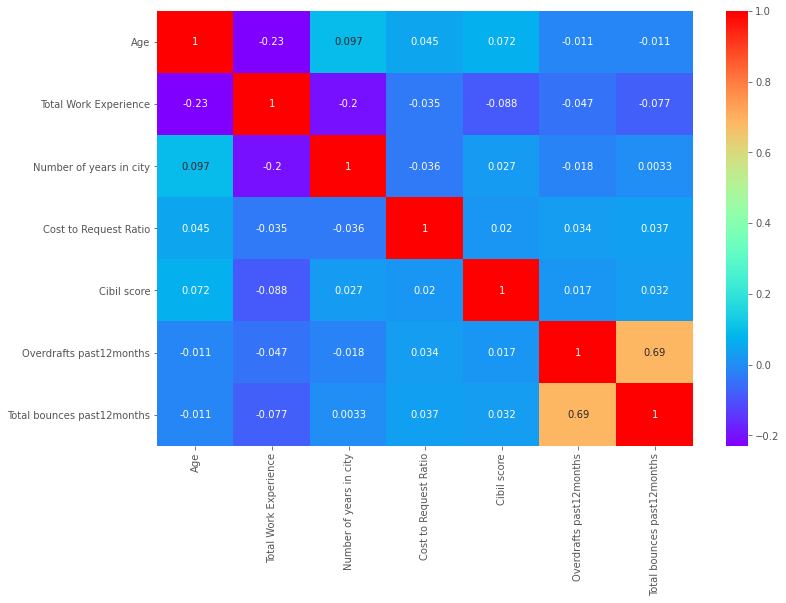

In [10]:
plt.figure(figsize=(12,8))  
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

### 8) Create target and features data where target is Total bounces past 12 months

In [11]:
X = df.drop('Total bounces past12months',axis=1)
Y = df['Total bounces past12months']

## Working with Model

### 1) Split data into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model = KNeighborsClassifier()

### 2) Create a KNN classifier between Features and target data

In [14]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

### 3) Display the test score

In [15]:
model.score(X_test,Y_test)

0.6664813785436353

### 4) Display the training score

In [16]:
model.score(X_train,Y_train)

0.6750972762645915

### 5) Print the accuracy score

In [17]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6664813785436353

### 6) Try 1 to 14 k values for classifier

In [18]:
train_score = []
test_score = []

for i in range(1,14):
    model = KNeighborsClassifier(i)
    model.fit(X_train,Y_train)
    
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))

### 7) Display training and testing score for all the 1 to 14 k values

In [24]:
print("Train Score : \n\n",train_score)
print("\n\nTest Score : \n\n",test_score)

Train Score : 

 [1.0, 0.7373540856031129, 0.7020566981656475, 0.683852140077821, 0.6750972762645915, 0.6616175653140633, 0.6596720400222346, 0.6543913285158421, 0.6531406336853808, 0.6523068371317399, 0.651473040578099, 0.6517509727626459, 0.650639244024458]


Test Score : 

 [0.5669816564758199, 0.6481378543635353, 0.642023346303502, 0.6592551417454141, 0.6664813785436353, 0.6675931072818232, 0.6731517509727627, 0.6731517509727627, 0.6759310728182324, 0.6759310728182324, 0.6781545302946081, 0.67982212340189, 0.6781545302946081]


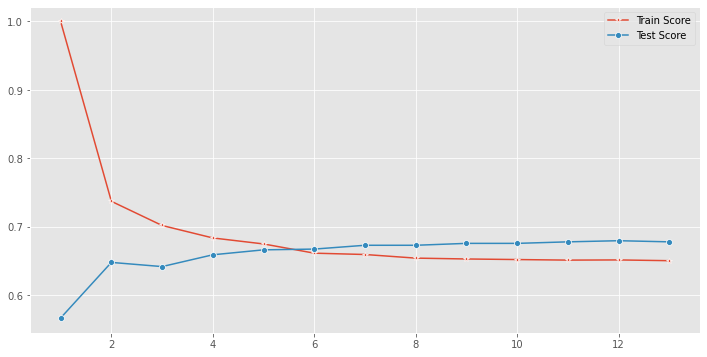

In [25]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
p = sns.lineplot(range(1,14),train_score,marker='*',label = 'Train Score')
p = sns.lineplot(range(1,14),test_score,marker='o',label='Test Score')